In [39]:
import numpy as np
import matplotlib.pyplot as plt

V_rms = 400 # V

# Plot phasors in the complex plane
def plot_phasors(phasors):
    """
    phasors is a dictionnary with labels as keys and phasors as values.
    """
    colors = ["r", "g", "b"]
    idx_color = 0
    plt.figure(figsize=(6,6))
    for (l, V) in phasors.items():
        plt.quiver(0, 0, V.real, V.imag, angles='xy', scale_units='xy', color=colors[idx_color], scale=1, label=l)
        idx_color += 1 
        idx_color %= len(colors)

    plt.xlim(-V_rms*1.2, V_rms*1.2)
    plt.ylim(-V_rms*1.2, V_rms*1.2)
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.grid(True)
    plt.title('Three-phase Phasors in Complex Plane')
    #plt.axis('equal')
    circle = plt.Circle((0, 0), V_rms, color='k', linestyle='dotted', fill=False, label=f'|V|={V_rms}')
    plt.legend()
    plt.gca().add_artist(circle)
    plt.show()

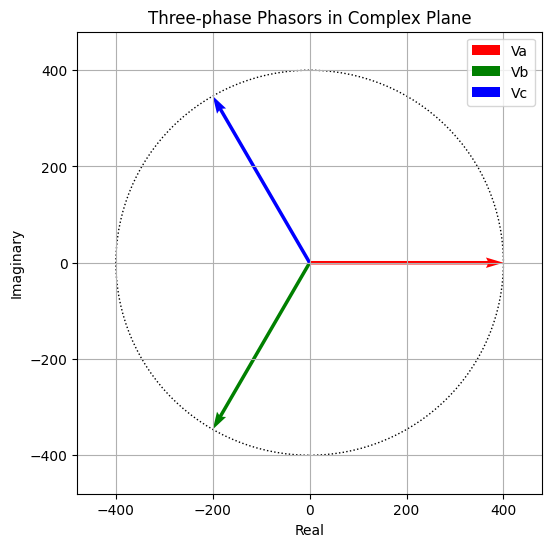

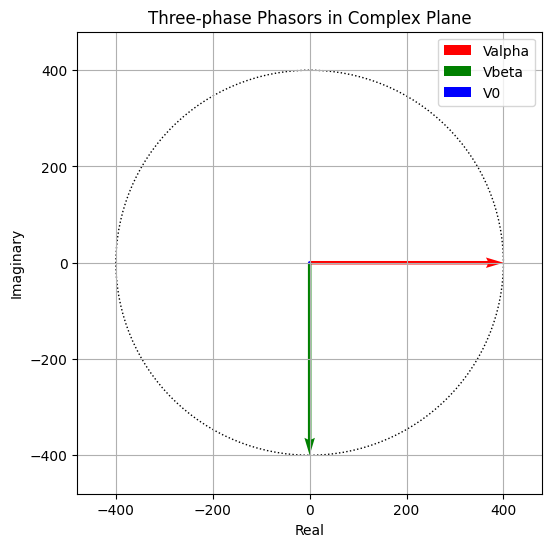

vd = 400.00-0.00j
vq = -0.00-400.00j
v0 = -0.00+0.00j


In [44]:
# Generate a set of abc phasors 

# Choose the time index (set initially to 0, then increment by 1e-3 s)
t = 0*1e-3 # s

w = 2 * np.pi * 50

vt = np.exp(1j*w*t) 

Va = V_rms * complex(1, 0)# magnitude V_rms, phase 0
Va *= vt
a = np.exp(1j*2*np.pi/3)
Vb = Va * a**2 
Vc = Va * a 

# Apply the Clarke transform

T_clarke = np.array([[2/3, -1/3, -1/3],
                     [0, 1/np.sqrt(3), -1/np.sqrt(3)],
                     [1/3, 1/3, 1/3]])
    
v_alpha_beta_0 = np.dot(T_clarke, [Va, Vb, Vc])

# Park transform
theta = w*t  # reference angle in rad
T_park = np.array([
    [np.cos(theta), np.sin(theta), 0],
    [-np.sin(theta), np.cos(theta), 0],
    [0, 0, 1]
])



# Plot initial phasors
plot_phasors({"Va": Va, "Vb": Vb, "Vc": Vc})

# Plot alpha, beta, zero phasors 
plot_phasors({"Valpha": v_alpha_beta_0[0], 
               "Vbeta": v_alpha_beta_0[1], 
               "V0": v_alpha_beta_0[2]})


# Apply Park to Clarke phasors
v_dq0 = np.dot(T_park, v_alpha_beta_0)

print(f"vd = {v_dq0[0]:.2f}")
print(f"vq = {v_dq0[1]:.2f}")
print(f"v0 = {v_dq0[2]:.2f}")